# Pymaceuticals Inc.
---

### Analysis

- There appears to be a positive correlation between the weight of a mouse and the average tumor volume as the correlation is .84. This means as the weight increases, the average tumor volume also increases.
- As seen in the mouse, "l509", as the timepoints are tracked, Capomulin was effective in decreasing the tumor size.
- As seen in the boxplot, it appears that Capomulin and Ramicane were the most effective of the 4 drugs - Capomulin, Ramicane, Ceftamin, and Infubinol.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata["Mouse ID"] = mouse_metadata["Mouse ID"].str.replace(r'""','')
mouse_combined = pd.merge(study_results,mouse_metadata,   how="left", on="Mouse ID")

# Display the data table for preview
mouse_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_combined["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_combined[mouse_combined.duplicated()]
duplicate_ID = duplicate_mice['Mouse ID'].loc[duplicate_mice.index[0]]
duplicate_mice['Mouse ID']

137    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_results = mouse_combined[mouse_combined["Mouse ID"]==duplicate_ID]
duplicate_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_combined[mouse_combined["Mouse ID"] != duplicate_ID]
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen = mouse_df.groupby(['Drug Regimen'])

drug_regimen_mean = drug_regimen["Tumor Volume (mm3)"].mean()
drug_regimen_median = drug_regimen["Tumor Volume (mm3)"].median()
drug_regimen_var = drug_regimen["Tumor Volume (mm3)"].var()
drug_regimen_std = drug_regimen["Tumor Volume (mm3)"].std()
drug_regimen_sem = drug_regimen["Tumor Volume (mm3)"].sem()

drug_regimen_summary = pd.DataFrame({
    "Mean Tumor Volume": drug_regimen_mean,
    "Median Tumor Volume": drug_regimen_median,
    "Tumor Volume Variance": drug_regimen_var,
    "Tumor Volume Std. Dev.": drug_regimen_std,
    "Tumor Volume Std. Err.": drug_regimen_sem
})
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggregated_drug_regimen = drug_regimen['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
aggregated_drug_regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

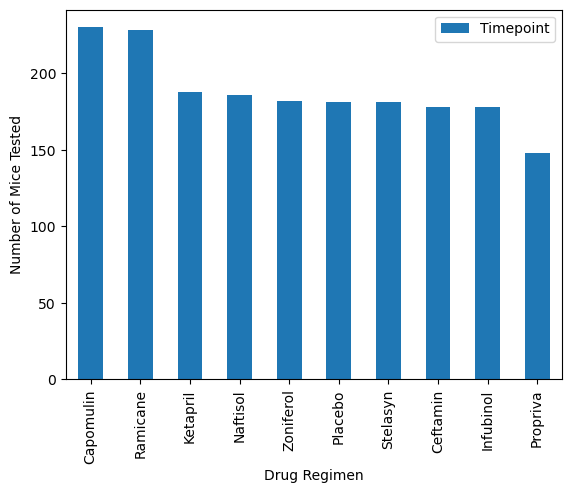

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_by_drug_regimen_df = pd.DataFrame(mouse_df.groupby('Drug Regimen')['Timepoint'].count())
sorted_df = timepoint_by_drug_regimen_df.sort_values(by="Timepoint",ascending=False)
sorted_df.plot(kind="bar", xlabel="Drug Regimen",ylabel="Number of Mice Tested")

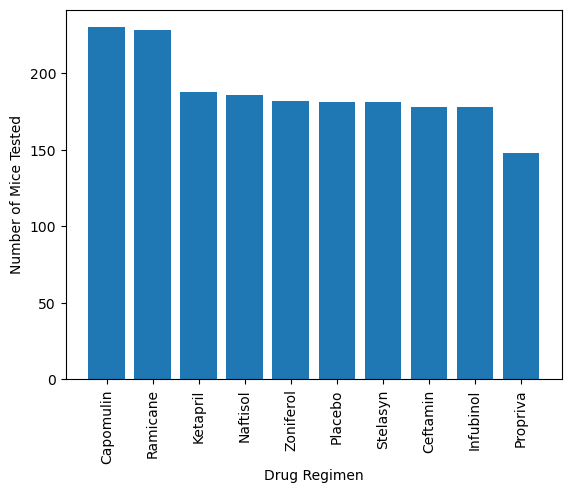

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_by_drug_regimen_df = pd.DataFrame(mouse_df.groupby('Drug Regimen')['Timepoint'].count())
sorted_df = timepoint_by_drug_regimen_df.sort_values(by="Timepoint",ascending=False)
plt.bar(align='center',height=sorted_df['Timepoint'],x=sorted_df.index)
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.show()


array([<AxesSubplot:ylabel='Sex'>], dtype=object)

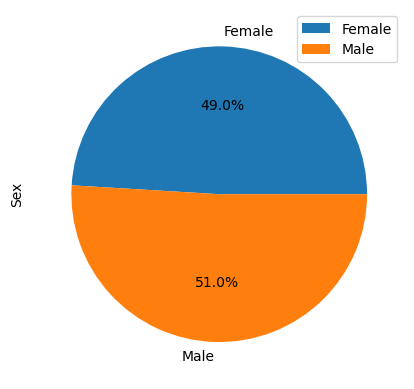

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = pd.DataFrame(mouse_df.groupby('Sex')['Sex'].count())
sex_df.plot(kind="pie", 
            autopct='%1.1f%%',
           subplots=True)


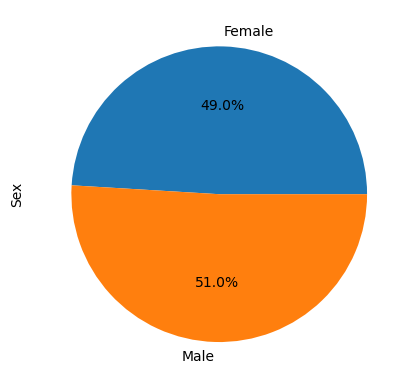

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
        x=sex_df['Sex'],
        autopct='%1.1f%%',
        labels=sex_df.index
        )
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = mouse_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_df = pd.merge(max_time, mouse_df,how='left',on=['Mouse ID','Timepoint'])
merged_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index in merged_mouse_df.index:
    if merged_mouse_df['Drug Regimen'][index] == treatment[0]:
        capomulin.append(merged_mouse_df['Tumor Volume (mm3)'][index])
    if merged_mouse_df['Drug Regimen'][index] == treatment[1]:
        ramicane.append(merged_mouse_df['Tumor Volume (mm3)'][index])
    if merged_mouse_df['Drug Regimen'][index] == treatment[2]:
        infubinol.append(merged_mouse_df['Tumor Volume (mm3)'][index])
    if merged_mouse_df['Drug Regimen'][index] == treatment[3]:
        ceftamin.append(merged_mouse_df['Tumor Volume (mm3)'][index])
        
    # add subset 
treatment_df = pd.DataFrame({
    treatment[0]: capomulin,
    treatment[1]: ramicane,
    treatment[2]: infubinol,
    treatment[3]: ceftamin
})
treatment_df 
    
    # Determine outliers using upper and lower bounds
#CAPOMULIN calculations
quartile_capomulin = treatment_df[treatment[0]].quantile([.25,.50,.75])
lower_capomulin = quartile_capomulin[.25]
upper_capomulin = quartile_capomulin[.75]
iqr_capomulin = upper_capomulin - lower_capomulin
lower_bound_capomulin = lower_capomulin - (1.5 * iqr_capomulin)
upper_bound_capomulin = upper_capomulin + (1.5 * iqr_capomulin)
print("Capomulin's potential outliers: "+str(lower_bound_capomulin)+" and "+str(upper_bound_capomulin))  

#RAMICANE calculations
quartile_ramicane = treatment_df[treatment[1]].quantile([.25,.50,.75])
lower_ramicane = quartile_ramicane[.25]
upper_ramicane = quartile_ramicane[.75]
iqr_ramicane = upper_ramicane - lower_ramicane
lower_bound_ramicane = lower_ramicane - (1.5 * iqr_ramicane)
upper_bound_ramicane = upper_ramicane + (1.5 * iqr_ramicane)
print("Ramicane's potential outliers: "+str(lower_bound_ramicane)+" and "+str(upper_bound_ramicane))  

#INFUBINOL calculations
quartile_infubinol = treatment_df[treatment[2]].quantile([.25,.50,.75])
lower_infubinol = quartile_infubinol[.25]
upper_infubinol = quartile_infubinol[.75]
iqr_infubinol = upper_infubinol - lower_infubinol
lower_bound_infubinol = lower_infubinol - (1.5 * iqr_infubinol)
upper_bound_infubinol = upper_infubinol + (1.5 * iqr_infubinol)
print("Infubinol's potential outliers: "+str(lower_bound_infubinol)+" and "+str(upper_bound_infubinol))  

#CEFTAMIN calculations
quartile_ceftamin = treatment_df[treatment[3]].quantile([.25,.50,.75])
lower_ceftamin = quartile_ceftamin[.25]
upper_ceftamin = quartile_ceftamin[.75]
iqr_ceftamin = upper_ceftamin - lower_ceftamin
lower_bound_ceftamin = lower_ceftamin - (1.5 * iqr_ceftamin)
upper_bound_ceftamin = upper_ceftamin + (1.5 * iqr_ceftamin)
print("Ceftamin's potential outliers: "+str(lower_bound_ceftamin)+" and "+str(upper_bound_ceftamin))  


Capomulin's potential outliers: 20.70456164999999 and 51.83201549
Ramicane's potential outliers: 17.912664470000003 and 54.30681135
Infubinol's potential outliers: 36.83290494999999 and 82.74144559000001
Ceftamin's potential outliers: 25.355449580000002 and 87.66645829999999


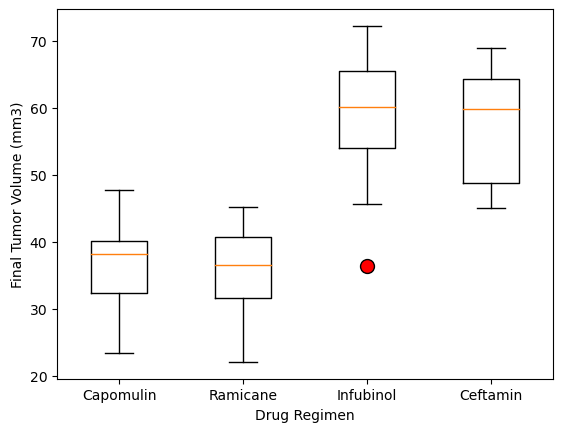

In [102]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

datapoints = [treatment_df[treatment[0]],
             treatment_df[treatment[1]],
             treatment_df[treatment[2]],
             treatment_df[treatment[3]]]

fig, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.boxplot(datapoints, labels=treatment,flierprops={'marker': 'o', 'markersize':10,'markerfacecolor': 'red'})

plt.savefig('drug regimen boxplot')
plt.show()


## Line and Scatter Plots

In [103]:
mouse_l509_df = mouse_df.loc[mouse_df["Mouse ID"] == "l509"]
mouse_l509_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


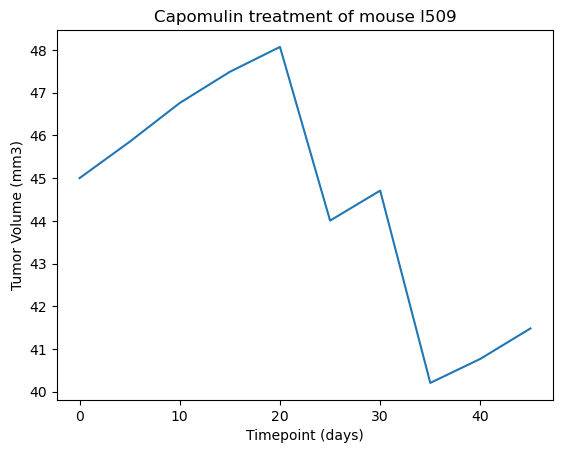

In [104]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509_df = mouse_df.loc[mouse_df["Mouse ID"] == "l509"]
x_axis = mouse_l509_df['Timepoint']
y_axis = mouse_l509_df['Tumor Volume (mm3)']

plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis,y_axis)

plt.savefig('Capomulin Treatment of Mouse l509')
plt.show()

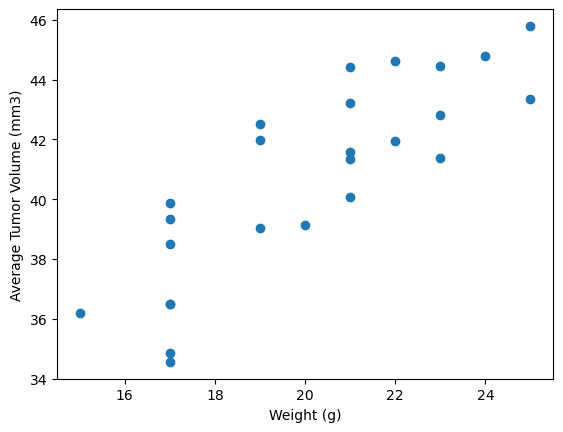

In [121]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = mouse_df.loc[mouse_df['Drug Regimen']=="Capomulin"]
capomulin_average = capomulin_data.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.savefig("Scatter plot of average mouse weight vs tumor volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


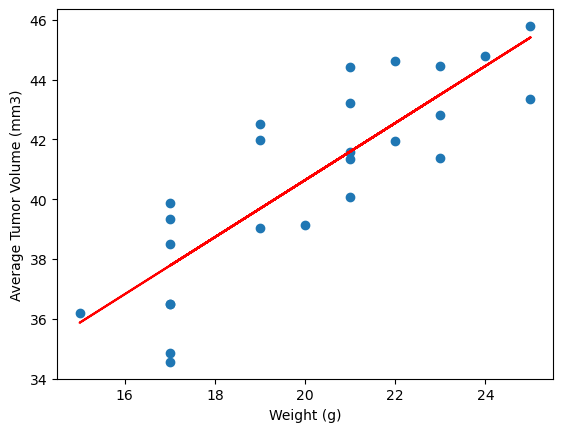

In [120]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
regress_values = capomulin_average['Weight (g)'] * slope + intercept

plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(capomulin_average['Weight (g)'], regress_values,"r-")

plt.savefig("Scatter plot of average mouse weight vs tumor volume with line regression")
plt.show()